In [473]:
#!pip install scikit-learn
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3.8 install --upgrade pip


In [474]:
import csv
!pip install scikit-learn
!pip install pandas
!pip install seaborn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [475]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [476]:
NUM_CLASSES = 6

# 学習データ読み込み

In [477]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [478]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [480]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [481]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_42 (Dropout)        (None, 42)                0         
                                                                 
 dense_63 (Dense)            (None, 20)                860       
                                                                 
 dropout_43 (Dropout)        (None, 20)                0         
                                                                 
 dense_64 (Dense)            (None, 10)                210       
                                                                 
 dense_65 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [482]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [483]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [484]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2024-02-22 15:13:58.269686: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 0 4 1 4 2 0 3 0 5 3 4 4 5 4 5 3 3 0 0 4 4 0 1 3 4 0 4 4 4 2 0 4 0 0 0 5 4 4 0 4 0 0 3 0 4 5 5 5 3 4 0 5 4 4 0 4 5 5 4 0 0 0 5 4 5 4 0 4 2 0 0 4 5 0 4 4 5 1 0 0 4 0 0 0 0 0 0 4 0 2 0 0 2 0 4 4 1 0 0 4 5 0 5 0 5 5 5 0 0 1 4 4 0 0 4 1 4 1 0 0 5 1 5 4 1 5 0 0


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/vaibhavgogia/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/ipykernel_22688/2889966517.py", line 1, in <module>
      model.fit(
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 0 4 1 4 2 0 3 0 5 3 4 4 5 4 5 3 3 0 0 4 4 0 1 3 4 0 4 4 4 2 0 4 0 0 0 5 4 4 0 4 0 0 3 0 4 5 5 5 3 4 0 5 4 4 0 4 5 5 4 0 0 0 5 4 5 4 0 4 2 0 0 4 5 0 4 4 5 1 0 0 4 0 0 0 0 0 0 4 0 2 0 0 2 0 4 4 1 0 0 4 5 0 5 0 5 5 5 0 0 1 4 4 0 0 4 1 4 1 0 0 5 1 5 4 1 5 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_970943]

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.9882


In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 21ms/step
[0.307764   0.01587163 0.01137971 0.65370446 0.01128014]
3


# 混同行列


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3.8 install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3.8 install --upgrade pip
6/6 [==============================] - 0s 479us/step


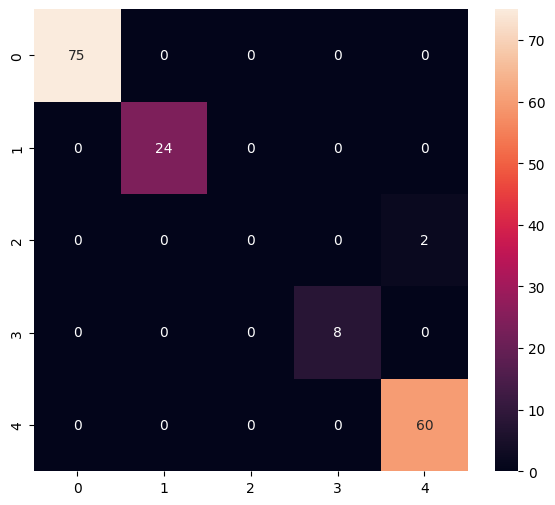

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        24
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         8
           4       0.97      1.00      0.98        60

    accuracy                           0.99       169
   macro avg       0.79      0.80      0.80       169
weighted avg       0.98      0.99      0.98       169



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpdrq5bcky/assets


INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpdrq5bcky/assets
2024-02-22 15:02:10.977070: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-02-22 15:02:10.977086: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-02-22 15:02:10.977205: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpdrq5bcky
2024-02-22 15:02:10.977823: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-02-22 15:02:10.977827: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpdrq5bcky
2024-02-22 15:02:10.979736: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-02-22 15:02:11.001354: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

6668

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 62 µs, sys: 30 µs, total: 92 µs
Wall time: 82.3 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.30776408 0.01587163 0.01137971 0.65370446 0.01128015]
3
